In [12]:
import numpy as np
import os
import scipy
import sys
sys.path.insert(1, 'functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [13]:
base_path = '/work/bk1377/a270230/'

path_ds   = base_path + 'lkf_datasets/daily_data/'
path_out   = base_path + 'data_transfer/'
path_imgs = base_path + 'imgs/statistics/'

In [14]:
years = [2013, 2016, 2020, 2093, 2096, 2099]

In [15]:
lkf_data = []
for year in years:
    lkf_data.append(np.load(path_ds + f'ds_{year}.npy', allow_pickle=True)[0])

In [17]:
ind = 10

In [18]:
eps_mean, eps_var, eps_skew = [], [], []

for lkf_dataset in lkf_data:

    eps_mean_tmp, eps_var_tmp, eps_skew_tmp = [], [], []
    for i in range(ind):
        eps_day_i = np.concatenate(lkf_dataset.calc_eps(i)[0])
        
        eps_mean_tmp.append(np.nanmean(eps_day_i))
        eps_var_tmp.append(np.nanvar(eps_day_i))
        eps_skew_tmp.append(scipy.stats.skew(eps_day_i, nan_policy='omit'))
        
    eps_mean.append(eps_mean_tmp)
    eps_var.append(eps_var_tmp)
    eps_skew.append(eps_skew_tmp)

In [19]:
eps_moments = [eps_mean, eps_var, eps_skew]
np.save(path_dt + 'eps_moments.npy', eps_moments)

In [20]:
[eps_mean, eps_var, eps_skew] = np.load(path_dt + 'eps_moments.npy')

In [21]:
eps_mean_av, eps_mean_sd, eps_mean_90_av, eps_mean_90_sd = av_sd(eps_mean)
eps_var_av, eps_var_sd, eps_var_90_av, eps_var_90_sd = av_sd(eps_var)
eps_skew_av, eps_skew_sd, eps_skew_90_av, eps_skew_90_sd = av_sd(eps_skew)

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1130066/1019756494.py:12: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(data, label='$\dot{\epsilon}$ mean')
/tmp/ipykernel_1130066/1019756494.py:14: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(data2, label='$\dot{\epsilon}$ variance')
/tmp/ipykernel_1130066/1019756494.py:16: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(data3, label='$\dot{\epsilon}$ skewness')


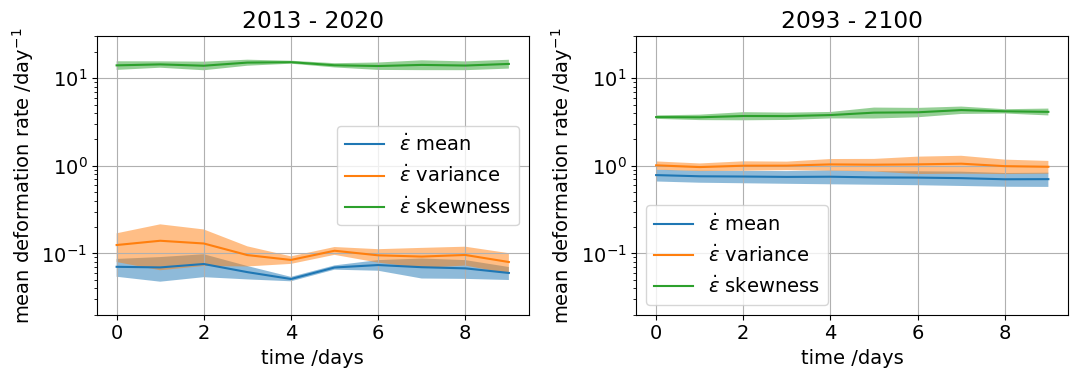

In [22]:
fig, axs = plt.subplots(1,2, figsize=(11,4))

i = 10

for ax, data, err, data2, err2, data3, err3, title in zip(
    axs,
    [eps_mean_av[:i], eps_mean_90_av[:i]], [eps_mean_sd[:i], eps_mean_90_sd[:i]],
    [eps_var_av[:i], eps_var_90_av[:i]], [eps_var_sd[:i], eps_var_90_sd[:i]],
    [eps_skew_av[:i], eps_skew_90_av[:i]], [eps_skew_sd[:i], eps_skew_90_sd[:i]],
    ['2013 - 2020', '2093 - 2100']
):
    ax.plot(data, label='$\dot{\epsilon}$ mean')
    ax.fill_between(np.arange(i), data-err, data+err, alpha=0.5)
    ax.plot(data2, label='$\dot{\epsilon}$ variance')
    ax.fill_between(np.arange(i), data2-err2, data2+err2, alpha=0.5)
    ax.plot(data3, label='$\dot{\epsilon}$ skewness')
    ax.fill_between(np.arange(i), data3-err3, data3+err3, alpha=0.5)
    #ax.set_ylim([2e-2,1.5])
    ax.set_ylim([2e-2, 3e1])
    ax.set_yscale('log')
    ax.grid()
    ax.set_ylabel('mean deformation rate /day$^{-1}$')
    ax.set_xlabel('time /days')
    ax.set_title(title)
    ax.legend()
    
fig.tight_layout()
#plt.savefig(path_imgs + 'comp_eps.png', dpi=200, bbox_inches='tight')